In [32]:
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

import requests
from bs4 import BeautifulSoup
import seaborn as sns

In [33]:
import time
quest = []
freq = {}

for i in range(1,6):
    res = requests.get("https://qna.programmers.co.kr/?page={}".format(i),user_agent)
    soup = BeautifulSoup(res.text,"html.parser")
    
    questions = soup.find_all("li","question-list-item")
    for question in questions:
        quest.append(question.h4.text.strip())
    time.sleep(0.5)


In [25]:
quest[:10]

['Situs IDN Poker Online Resmi Terpercaya Indonesia',
 '자바 객체선언 오류 질문입니다!',
 '파이썬 간단한 코드 질문',
 '[ASP, VB.NET] API 제공 중인데 json 값 앞에 태그가 붙은 이유가 뭘까요?',
 "'''로 주석으로 만들었는데 왜 주석을 지우지 않으면 유니코드오류가 왜 나는지 모르겠어여",
 '#define 상수 선언떄',
 '우분투 vmware 가상머신 오류',
 '파이썬 멀티스레딩 질문',
 '파이썬 엑셀 파일 읽기',
 '머쓱이 스탬프 할때 답보기요']

In [10]:
questions[:10]

[]

In [27]:
hannanum = Hannanum()
words = []
for ele in quest:
    nouns = hannanum.nouns(ele)# 리스트를 순회
    words+=nouns # 누적
    
print(len(words))

1017


In [28]:
counter = Counter(words)

counter

Counter({'자바': 6,
         '객체선언': 1,
         '오류': 15,
         '질문': 53,
         '파이썬': 47,
         '한': 3,
         '코드': 14,
         '제공': 1,
         '중': 8,
         '값': 7,
         '앞': 1,
         '태그': 1,
         '이유': 3,
         '뭘까요': 2,
         '주석': 2,
         '유니코드오류': 1,
         '모르겠어': 1,
         '#define': 1,
         '상수': 1,
         '선언떄': 1,
         '우분투': 1,
         '가상머신': 1,
         '멀티스레딩': 1,
         '엑셀': 1,
         '파': 6,
         '읽기': 1,
         '머쓱': 1,
         '스탬프': 1,
         '때': 10,
         '답보기요': 1,
         '사용': 13,
         '무관한지': 1,
         '궁금': 4,
         'C#': 2,
         '백준': 1,
         '25206': 1,
         '문제': 17,
         '뭐': 3,
         '확인': 2,
         '고수분': 1,
         '제너레이터화': 1,
         '리액트': 1,
         '쿼리': 2,
         '로': 1,
         'js통해서': 1,
         '아두이노': 1,
         '통신관련': 1,
         '정규표현식': 1,
         '패턴': 2,
         '추출': 1,
         "'MODULE_NOT_FOUND'": 1,
         '데이터베이스': 1,

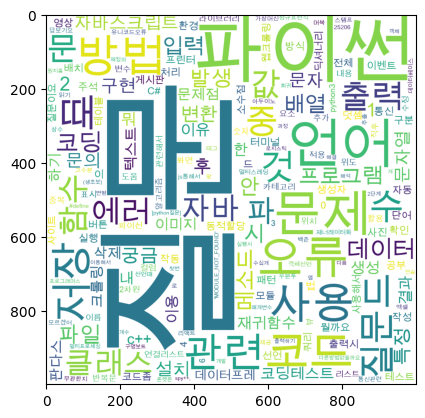

In [31]:
wordcloud = WordCloud(

    font_path = "/Library/Fonts/Arial Unicode.ttf",
    background_color = "white",
    height = 1000,
    width = 1000,
    
    
)


img = wordcloud.generate_from_frequencies(counter)

plt.imshow(img)